In [3]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## ANOMALY DETECTION PART 1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs


%pip install --upgrade scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [1]:
#=================================================-
#### Slide 27: Loading packages  ####

import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeClassifier




In [4]:
#=================================================-
#### Slide 28: Directory settings  ####

# Set 'main_dir' to location of the project folder
from pathlib import Path 
home_dir = Path(".").resolve()
main_dir = home_dir.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)




C:\Users\cskeenan\Downloads\AnomalyDetection-main (1)\AnomalyDetection-main
C:\Users\cskeenan\Downloads\AnomalyDetection-main (1)\AnomalyDetection-main/data


In [5]:
#=================================================-
#### Slide 29: Load the dataset  ####

paysim = pd.read_csv(str(data_dir)+"/paysim_transactions.csv")
paysim.head()
paysim.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20220 entries, 0 to 20219
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            20220 non-null  int64  
 1   type            20220 non-null  object 
 2   amount          20220 non-null  float64
 3   nameOrig        20220 non-null  object 
 4   oldbalanceOrg   20220 non-null  float64
 5   newbalanceOrig  20220 non-null  float64
 6   nameDest        20220 non-null  object 
 7   oldbalanceDest  20220 non-null  float64
 8   newbalanceDest  20220 non-null  float64
 9   isFraud         20220 non-null  int64  
 10  isFlaggedFraud  20220 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.7+ MB


In [6]:
#=================================================-
#### Slide 30: Understand the dataset  ####

paysim.columns




Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

isFraud
0    0.98912
1    0.01088
Name: count, dtype: float64


<Axes: xlabel='isFraud'>

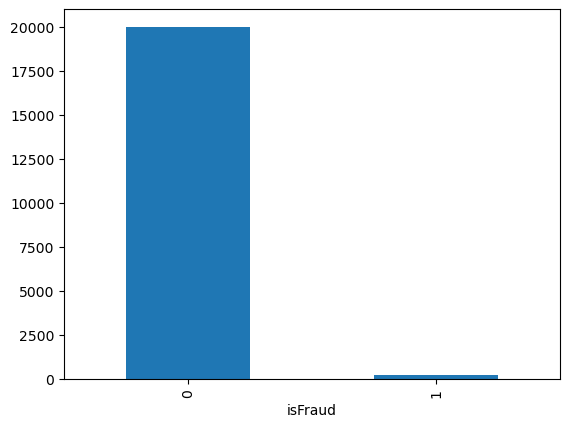

In [7]:
#=================================================-
#### Slide 31: Target of the dataset  ####

paysim['isFraud'].value_counts()

print(paysim['isFraud'].value_counts() / len(paysim))
paysim['isFraud'].value_counts().plot(kind = 'bar')




In [ ]:
#=================================================-
#### Slide 32: EDA of the dataset  ####

paysim.isnull().sum()
paysim['type'].value_counts().plot(kind = 'bar')




In [ ]:
#=================================================-
#### Slide 34: Subset the data  ####

# Subset variables from fraud dataset
paysim_dbscan = paysim.drop(['step', 'type','nameOrig', 'nameDest', 'isFlaggedFraud','isFraud'], axis = 1)
print(paysim_dbscan.head())




In [ ]:
#=================================================-
#### Slide 35: Data cleaning: NAs  ####

print(paysim_dbscan.isnull().sum())




In [ ]:
#=================================================-
#### Slide 36: StandardScalar  ####

# Instantiate MinMaxScaler.
scaler = StandardScaler()

# Scale the dataframe.
paysim_dbscan_scaled = scaler.fit_transform(paysim_dbscan)
# Convert back to dataframe, making sure to name the columns again.
paysim_dbscan_scaled = pd.DataFrame(paysim_dbscan_scaled, columns = paysim_dbscan.columns)
print(paysim_dbscan_scaled.head())




In [ ]:
#=================================================-
#### Slide 38: DBSCAN: model   ####

# Let's run DBSCAN.
dbscan = DBSCAN(eps=0.2, min_samples = 5)
clusters = dbscan.fit_predict(paysim_dbscan_scaled)

# Check the number of clusters
unique, counts = np.unique(clusters, return_counts=True)
print(np.asarray((unique, counts)).T)




In [ ]:
#=================================================-
#### Slide 39: Exercise 1  ####






In [ ]:
#=================================================-
#### Slide 44: Optimal Eps determination  ####

nn_model = NearestNeighbors(n_neighbors=10)
nbrs = nn_model.fit(paysim_dbscan_scaled)
distances, indices = nbrs.kneighbors(paysim_dbscan_scaled)
distances = np.mean(distances,axis=1)
distances = np.sort(distances, axis=0)




In [ ]:
#=================================================-
#### Slide 47: DBSCAN: optimized model  ####

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples = 10)
optimized_clusters = dbscan.fit_predict(paysim_dbscan_scaled)

# Check the number of clusters
unique, counts = np.unique(optimized_clusters, return_counts=True)
print(np.asarray((unique, counts)).T)
paysim_dbscan['cluster'] = optimized_clusters

paysim_dbscan.loc[paysim_dbscan['cluster'] >= 0,'cluster'] = 0
paysim_dbscan.loc[paysim_dbscan['cluster'] == -1,'cluster'] = 1




In [ ]:
#=================================================-
#### Slide 48: Visualize the Anomalies  ####

fig, ax = plt.subplots()
sc = ax.scatter(paysim_dbscan['oldbalanceOrg'], paysim_dbscan['newbalanceOrig'], c = paysim_dbscan['cluster'], alpha = 0.8)
ax.legend(*sc.legend_elements())
plt.xlabel('Amount of transaction')
plt.ylabel('Origin new balance after transaction')
fig, ax = plt.subplots()
sc = ax.scatter(paysim_dbscan['oldbalanceOrg'], paysim_dbscan['newbalanceOrig'], c = paysim_dbscan['cluster'], alpha = 0.8)
ax.legend(*sc.legend_elements())
plt.xlabel('Amount of transaction')
plt.ylabel('Origin new balance after transaction')




In [ ]:
#=================================================-
#### Slide 49: Visualize the Anomalies  ####

fig, ax = plt.subplots()
sc = ax.scatter(paysim_dbscan['amount'], paysim_dbscan['newbalanceDest'], c = paysim_dbscan['cluster'], alpha = 0.8)
ax.legend(*sc.legend_elements())
plt.xlabel('Amount')
plt.ylabel('Recipient new Balance after transaction')
plt.show()
fig, ax = plt.subplots()
sc = ax.scatter(paysim_dbscan['amount'], paysim_dbscan['newbalanceDest'], c = paysim_dbscan['cluster'], alpha = 0.8)
ax.legend(*sc.legend_elements())
plt.xlabel('Amount')
plt.ylabel('Recipient new Balance after transaction')
plt.show()




In [ ]:
#=================================================-
#### Slide 52: Exercise 2  ####




#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################


In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## ANOMALY DETECTION PART 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs




In [ ]:
#=================================================-
#### Slide 4: Loading packages  ####

import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeClassifier




In [ ]:
#=================================================-
#### Slide 5: Directory settings  ####

# Set 'main_dir' to location of the project folder
from pathlib import Path 
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)




In [ ]:
#=================================================-
#### Slide 6: Time series data: load energy consumption  ####

pjm_energy = pd.read_csv(str(data_dir)+"/PJME_hourly.csv")
pjm_energy.head()




In [ ]:
#=================================================-
#### Slide 7: Time series data: preprocessing  ####

pjm_energy['Datetime'] = pd.to_datetime(pjm_energy['Datetime'])
pjm_energy.info()
pjm_energy = pjm_energy[pjm_energy['Datetime'] > '2018-01-01 00:00:00']
pjm_energy.shape




In [ ]:
#=================================================-
#### Slide 8: Visualize the data: line plot  ####

pjm_energy.plot(x='Datetime', y='PJME_MW', figsize=(17,5))
plt.xlabel('Date time')
plt.ylabel('Energy Consumption')
plt.title('Energy consumption (MW) at each hour in 2018')
plt.show()




In [ ]:
#=================================================-
#### Slide 9: Scaling on time series data  ####

scaler = StandardScaler()

# Scale the dataframe.
pjm_energy_scaled = scaler.fit_transform(pd.DataFrame(pjm_energy['PJME_MW']))
print(pjm_energy_scaled)




In [ ]:
#=================================================-
#### Slide 12: DBSCAN on time series data  ####

dbscan_energy = DBSCAN(eps = 0.03, metric='euclidean', min_samples=5, n_jobs = -1)

pjm_energy['anomaly'] =  dbscan_energy.fit_predict(pd.DataFrame(pjm_energy_scaled))




In [ ]:
#=================================================-
#### Slide 14: Anomalies detected  ####

pjm_energy[pjm_energy['anomaly'] == -1]




In [ ]:
#=================================================-
#### Slide 16: Exercise 3  ####






In [ ]:
#=================================================-
#### Slide 29: Prepare a dataset for decision tree modeling  ####

paysim = pd.read_csv(str(data_dir)+"/paysim_transactions.csv")
# Drop columns. 
paysim = paysim.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)
paysim.columns




In [ ]:
#=================================================-
#### Slide 30: Convert categorical to dummy  ####

paysim['type'] = pd.Categorical(paysim['type'])
paysim['type'] = paysim['type'].cat.codes
colname = pd.get_dummies(paysim['type'], prefix = 'type', drop_first = True)
paysim = pd.concat([paysim, colname], axis = 1)
paysim.drop(['type'], axis = 1, inplace = True)

paysim.columns




In [ ]:
#=================================================-
#### Slide 31: Decision tree classification  ####

# Select predictors and target.
y = paysim['isFraud']
X = paysim.drop(['isFraud'], axis = 1)

# Build a logistic regression model.
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
dtree = DecisionTreeClassifier(max_depth = 10)
dtree.fit(X_train, y_train)




In [ ]:
#=================================================-
#### Slide 32: Predict the target  ####

dtree_y_train_pred = dtree.predict(X_train)
dtree_y_test_pred = dtree.predict(X_test)
dtree_accuracy = metrics.accuracy_score(y_test, dtree_y_test_pred)
print("Accuracy of test data:\t", dtree_accuracy)
# ROC AUC value.
roc_auc_score(y_test, dtree_y_test_pred)




In [ ]:
#=================================================-
#### Slide 33: Confusion matrix of training data  ####

print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train, dtree_y_train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))
print('Percentage of accurate fraud cases is ', 133/153)




In [ ]:
#=================================================-
#### Slide 34: Confusion matrix of test data  ####

print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test, dtree_y_test_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))
print('Percentage of accurate fraud cases is', 45/67)




In [ ]:
#=================================================-
#### Slide 37: Find TPR and TNR  ####

tn, fp, fn, tp = confusion_matrix(y_test, dtree_y_test_pred).ravel()

# Find the TNR.
non_fraud_eval = tn / (tn + fp)
print(non_fraud_eval)
# Find the TPR.
fraud_eval = tp / (tp + fn)
print(fraud_eval)




In [ ]:
#=================================================-
#### Slide 38: Save the metric  ####

performance_df = pd.DataFrame(columns = ['model_name', 'TPR', 'TNR'])

s = pd.Series(['Decision_tree_baseline', fraud_eval, non_fraud_eval], 
              index=['model_name', 'TPR', 'TNR'])
performance_df = performance_df.append(s, ignore_index = True)
performance_df




In [ ]:
#=================================================-
#### Slide 40: Exercise 4  ####






In [ ]:
#=================================================-
#### Slide 49: SMOTE in fraud dataset  ####

sm = SMOTE(random_state = 1)
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)
# Shape of X_train.
print(X_train.shape)
# Print shape of X_train_new.
print(X_train_new.shape)
# Double check that the data has been balanced.
pd.Series(y_train_new).value_counts().plot.bar()




In [ ]:
#=================================================-
#### Slide 50: Fit the model and predict  ####

# Fit the model.
dtree.fit(X_train_new, y_train_new)

# Prediction for training data.
train_pred_sm = dtree.predict(X_train_new)

# Prediction for the test data.
test_pred_sm = dtree.predict(X_test)
train_pred_sm = dtree.predict(X_train_new)




In [ ]:
#=================================================-
#### Slide 51: Confusion matrix of training data  ####

print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))
print('Percentage of accurate fraud cases: ', 13999/14001)




In [ ]:
#=================================================-
#### Slide 52: Confusion matrix of test data  ####

print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test, test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))
print('Percentage of accurate fraud cases ', 58/67)




In [ ]:
#=================================================-
#### Slide 53: Find TPR and TNR and save  ####

# Find TPR and TNR and save the result.
tn, fp, fn, tp = confusion_matrix(y_test, test_pred_sm).ravel()
non_fraud_eval = tn / (tn + fp)
print(non_fraud_eval)
fraud_eval = tp / (tp + fn)
print(fraud_eval)




In [ ]:
#=================================================-
#### Slide 54: Add scores to the performance dataframe  ####

s = pd.Series(['SMOTE', fraud_eval, non_fraud_eval], 
              index=['model_name', 'TPR', 'TNR'])
performance_df = performance_df.append(s, ignore_index = True)
performance_df
pickle.dump(performance_df, open(str(data_dir) + "/performance_anomalies.sav","wb"))




In [ ]:
#=================================================-
#### Slide 56: Exercise 5  ####




#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################
